In [24]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from radfil import radfil_class, styles
import cv2
from astropy import units as u
import numpy as np
import imageio
import skimage.morphology as sk_m

In [ ]:
fil_spine = sk_m.skeletonize(fil_mask)
skeleton = cv2.cvtColor(skeleton, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Image Mask')

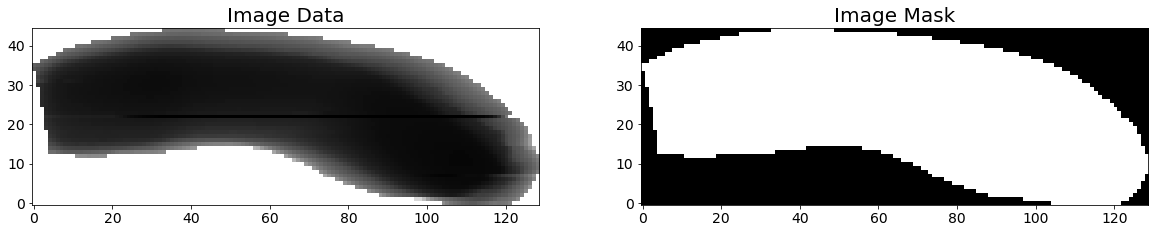

In [27]:
fil_image =imageio.imread("Individual_masks/10061218/cells/cell_id_13.png")
fil_image = cv2.cvtColor(fil_image, cv2.COLOR_BGR2GRAY)

fil_mask=imageio.imread("Individual_masks/10061218/masks/mask_id_13.png")
fil_spine = sk_m.skeletonize(fil_mask)
fil_spine = cv2.cvtColor(fil_spine, cv2.COLOR_BGR2GRAY)
fil_spine = np.array(fil_spine, dtype=bool)

fil_mask = cv2.cvtColor(fil_mask, cv2.COLOR_BGR2GRAY)
fil_mask = np.array(fil_mask, dtype=bool)

#plot our image and mask
fig, ax = plt.subplots(figsize=(20,10), ncols = 2)

ax[0].imshow(fil_image,origin='lower',cmap='Greys',norm=LogNorm())
ax[0].set_title("Image Data")

ax[1].imshow(fil_mask, origin="lower",cmap='Greys_r')
ax[1].set_title("Image Mask")

In [29]:
radobj=radfil_class.radfil(fil_image, mask=fil_mask, filspine=fil_spine, distance=200)

In [57]:
fil_image[20]

array([  0,   0,   0, 109, 116, 124, 131, 136, 139, 141, 143, 144, 146,
       148, 148, 150, 151, 151, 151, 151, 151, 152, 152, 153, 153, 153,
       154, 154, 154, 153, 152, 151, 151, 148, 146, 143, 142, 140, 137,
       134, 133, 131, 129, 128, 127, 127, 127, 127, 127, 126, 126, 126,
       125, 125, 126, 127, 127, 128, 128, 128, 128, 128, 128, 130, 130,
       132, 133, 133, 135, 136, 139, 142, 144, 147, 150, 153, 156, 159,
       163, 167, 170, 174, 178, 181, 185, 189, 192, 196, 198, 199, 200,
       201, 202, 203, 204, 205, 205, 206, 206, 206, 206, 206, 206, 205,
       204, 202, 198, 190, 177, 164, 153, 146, 144, 135, 115,  96,  87,
        79,  72,  66,  59,  53,  44,  36,  27,   0,   0,   0,   0],
      dtype=uint8)

# I have to skip the bit that finds length, but I can still use the pure version of filfinder to get that. 

## Note:
I think we might be able to just straight up take advantage of this to get all of the heights along the spine!

No binning is applied.


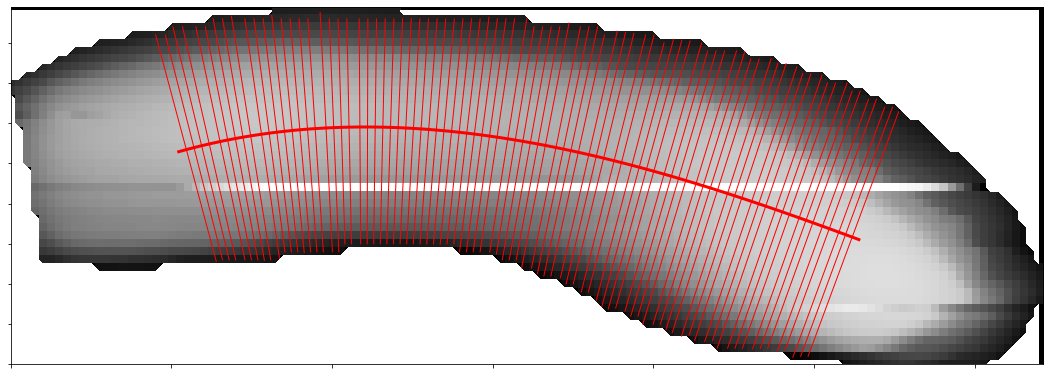

In [58]:
radobj.build_profile(samp_int=1, shift = False)
plt.gcf().set_size_inches(18.5, 10.5)

In [54]:
radobj.dictionary_cuts['distance']
# I think we can calculate distance from this via simply taking
# the last value in one of these arrays and taking the difference between it and the first value. 
# Ohhh, it takes the radial distance from this weird blue point? so I can get the total distance

[array([-15.81872718, -15.20204823, -14.6688622 , -13.68598307,
        -12.69594349, -12.16275746, -11.55323896, -10.4868669 ,
         -9.65665272,  -9.1234667 ,  -8.35412279,  -7.28775073,
         -6.61736196,  -6.08417593,  -5.15500662,  -4.11125721,
         -3.57807119,  -3.02226251,  -1.95589045,  -1.07196645,
         -0.53878042,   0.17685366,   1.24322572,   1.96732432,
          2.50051035,   3.37596983,   4.44234189,   5.00661509,
          5.53980112,   6.575086  ,   7.51271983,   8.04590586,
          8.70783011,   9.77420217,  10.5520106 ,  11.08519663,
         11.90694628,  12.97331834,  13.59130137,  14.1244874 ,
         15.10606245,  16.09740611,  16.63059214,  17.23880656,
         18.30517862,  19.13669688,  19.66988291,  20.43792273,
         21.50429479,  22.17598765,  22.70917368,  23.6370389 ,
         24.68209239,  25.21527842,  25.76978301,  26.83615507,
         27.72138316,  28.25456918,  28.96889918]),
 array([-24.42735829, -23.9083238 , -22.87122509, -2

In [53]:
radobj.dictionary_cuts['profile']

[array([  3.51367926,  14.75819308,  60.27867317, 118.47513274,
        152.41740558, 169.92146698, 182.04821498, 196.43409497,
        206.92534868, 217.21171109, 215.89678956, 210.93906842,
        213.16202885, 214.48129953, 215.92041572, 217.12416167,
        217.98664195, 217.7008815 , 217.28560916, 216.63102917,
        216.18193302, 215.        , 213.5       , 212.64194003,
        211.56122576, 208.86564634, 202.62028221, 197.66609342,
        189.35696449, 216.79652254, 208.56231845, 146.69198163,
        125.75413445, 103.76091946,  87.25816811,  78.54971662,
         69.07201488,  57.96439692,  51.77675571,  48.56976853,
         41.76187377,  33.6973192 ,  29.41067422,  22.9153452 ,
          4.51239344,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]),
 array([  0.        ,   0.        ,   0.        ,   

In [39]:
radobj.dictionary_cuts.keys()

dict_keys(['distance', 'profile', 'plot_peaks', 'plot_cuts', 'mask_width'])

In [42]:
radobj.xspline

array([104.75047305,  80.05432662,  54.87762932,  29.87242037])

### Alright! I should be able to get the radial profile using the distance output and I can get the height and stiffness along our line using the profile option! For the profil option, I will need to ask it to find the index of the minimum value in the distance array and then choose that for the height array. 